In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from ann_visualizer.visualize import ann_viz;


In [2]:
df = pd.read_csv("diabetes.csv") 
df['class'] = df['class'].map({'tested_negative': 0, 'tested_positive': 1})

X = df.values[:, :-1]
y = df.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)#278823)

In [3]:
# scaler = StandardScaler()

# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [4]:
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test, y_test))

17/17 [==============================] - 0s 886us/step
0.7057728119180633
8/8 [==============================] - 0s 1ms/step
0.696969696969697


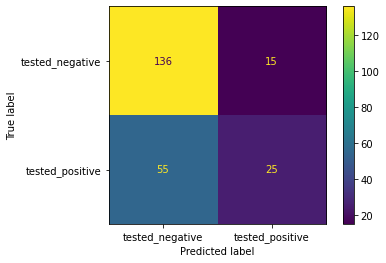

In [7]:
predictions_train = model.predict(X_train).round()
print(accuracy_score(predictions_train, y_train))

predictions_test = model.predict(X_test).round()
print(accuracy_score(predictions_test, y_test))

cm = confusion_matrix(y_test, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['tested_negative', 'tested_positive'])
disp.plot()

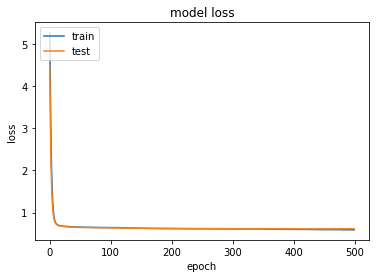

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Good fit

In [9]:
ann_viz(model, title="Diabetes Neural Network")

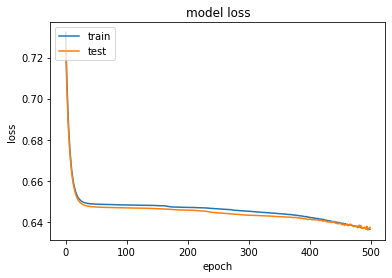

In [10]:
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test, y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Good fit

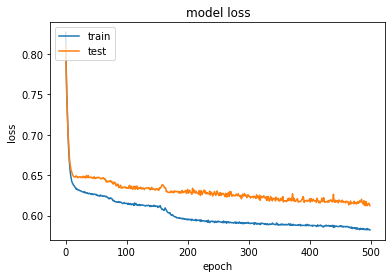

In [11]:
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test, y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Overfit

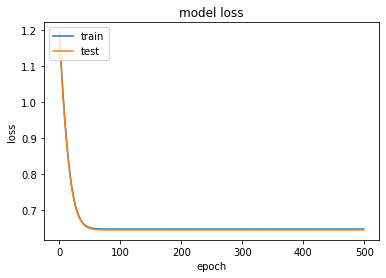

In [12]:
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test, y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Good fit

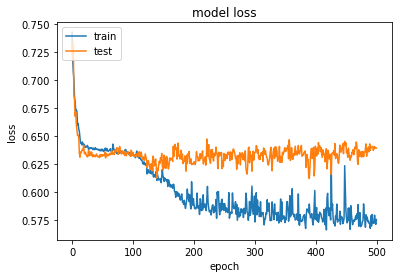

In [13]:
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test, y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Overfit